# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [ ]:
#import requests

weather_api_key = "cc135c71799a0851852c684de171606b"

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_url = url + "&q=" + "taiohae"

    
city_weather = requests.get(city_url).json()

city_weather

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
weather_api_key = "cc135c71799a0851852c684de171606b"

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [5]:
city_data

[{'City': 'bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 17.28,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 1.57,
  'Country': 'ZA',
  'Date': 1710814017},
 {'City': 'strezhevoy',
  'Lat': 60.7333,
  'Lng': 77.5889,
  'Max Temp': -11.13,
  'Humidity': 92,
  'Cloudiness': 57,
  'Wind Speed': 4.02,
  'Country': 'RU',
  'Date': 1710814017},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 1.81,
  'Humidity': 75,
  'Cloudiness': 20,
  'Wind Speed': 1.54,
  'Country': 'AR',
  'Date': 1710813878},
 {'City': 'longyearbyen',
  'Lat': 78.2186,
  'Lng': 15.6401,
  'Max Temp': -25.09,
  'Humidity': 77,
  'Cloudiness': 0,
  'Wind Speed': 3.09,
  'Country': 'SJ',
  'Date': 1710814018},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 1.18,
  'Humidity': 79,
  'Cloudiness': 99,
  'Wind Speed': 2.41,
  'Country': 'GS',
  'Date': 1710814018},
 {'City': 'shenjiamen',
  'Lat': 29.9576,
  'Lng': 122.298,
  'Max Temp': 9.33,
  'Humid

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

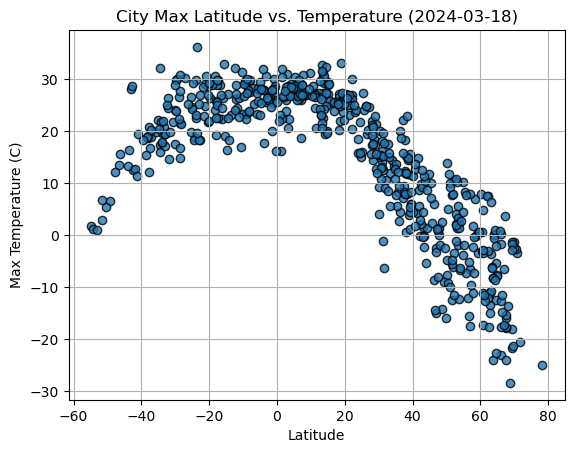

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")
    # Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

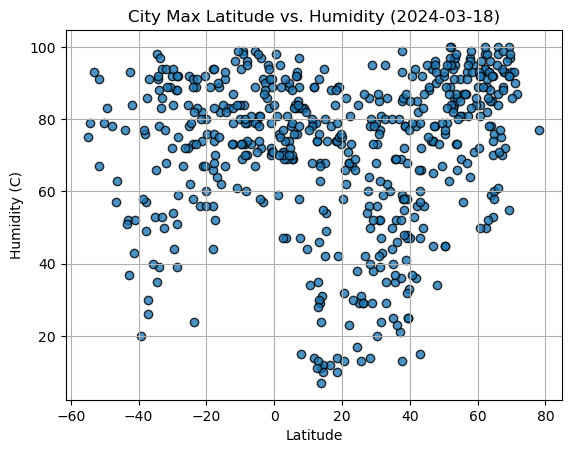

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (C)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

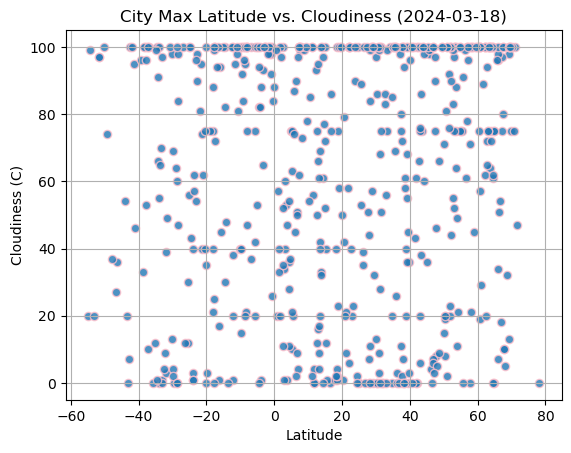

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="Pink",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (C)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

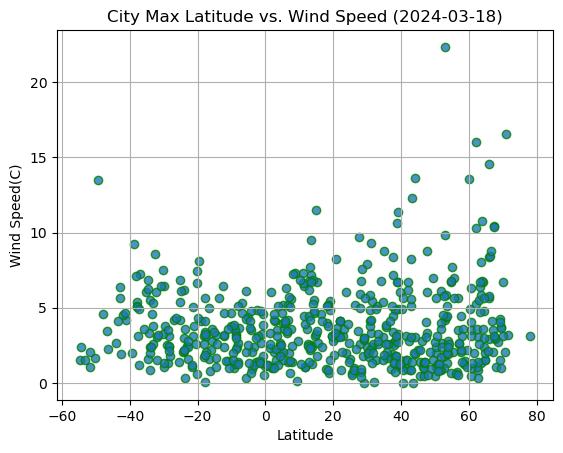

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="Green",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


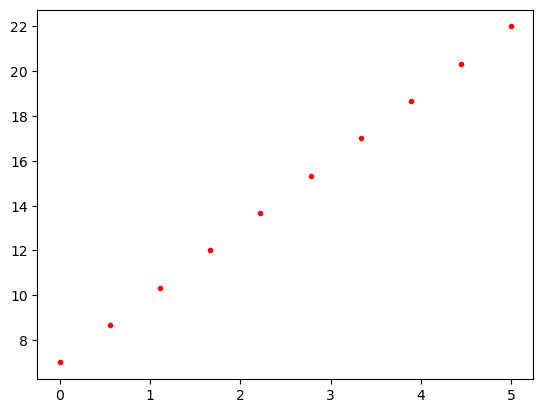

In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
x = np.linspace(0,5,10)
m = 3
b = 7
y = 3 * x + 7

plt.plot(x,y,'r.')

# np.random.seed(0)
# x = np.random.rand(100) * 10
# y = 2 * x + np.random.normal(scale=2, size=100)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,strezhevoy,60.7333,77.5889,-11.13,92,57,4.02,RU,1710814017
3,longyearbyen,78.2186,15.6401,-25.09,77,0,3.09,SJ,1710814018
5,shenjiamen,29.9576,122.2980,9.33,79,13,7.93,CN,1710814018
6,jamestown,42.0970,-79.2353,-0.23,85,100,6.69,US,1710814009
8,tiksi,71.6872,128.8694,-20.58,87,47,3.21,RU,1710814018


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,17.28,98,100,1.57,ZA,1710814017
2,ushuaia,-54.8000,-68.3000,1.81,75,20,1.54,AR,1710813878
4,grytviken,-54.2811,-36.5092,1.18,79,99,2.41,GS,1710814018
7,kununurra,-15.7667,128.7333,32.99,62,45,3.60,AU,1710813841
10,adamstown,-25.0660,-130.1015,24.66,78,100,6.84,PN,1710814018


TypeError: 'DataFrame' object is not callable

###  Temperature vs. Latitude Linear Regression Plot

The r is: -0.8969362198307117
The r-squared is: 0.8044945824442068


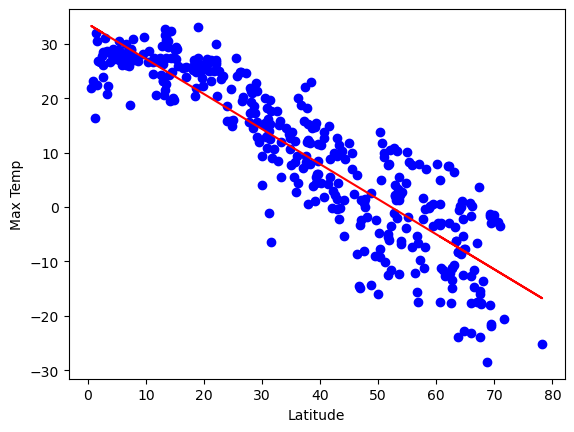

In [30]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r is: 0.655622658852709
The r-squared is: 0.4298410708010956


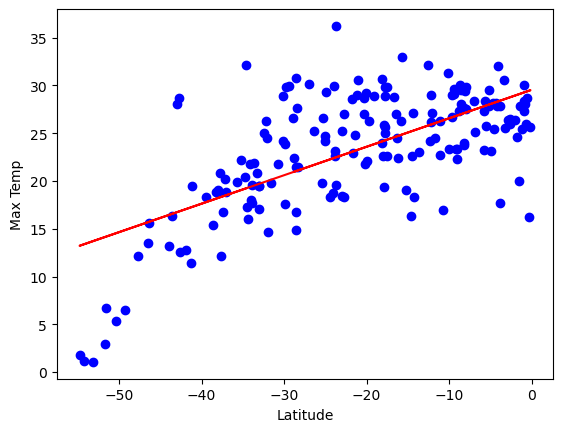

In [32]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r is: 0.32074439112593395
The r-squared is: 0.1028769644387461


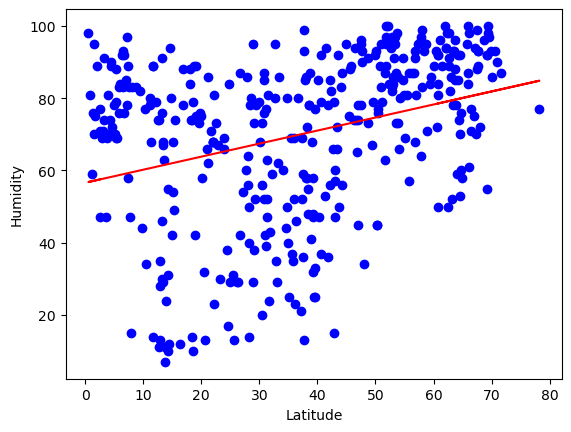

In [33]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r is: 0.2754164826151448
The r-squared is: 0.07585423889609835


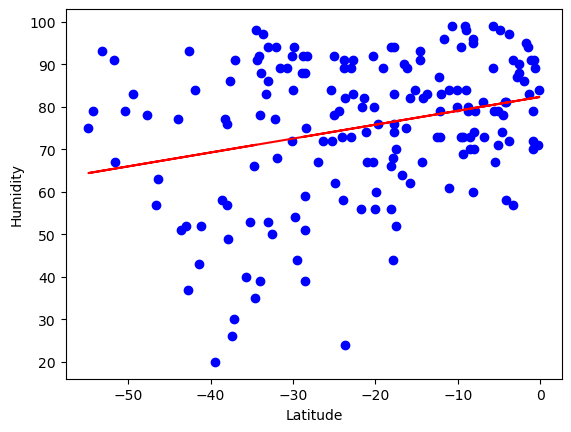

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r is: 0.2001094092425747
The r-squared is: 0.04004377566741224


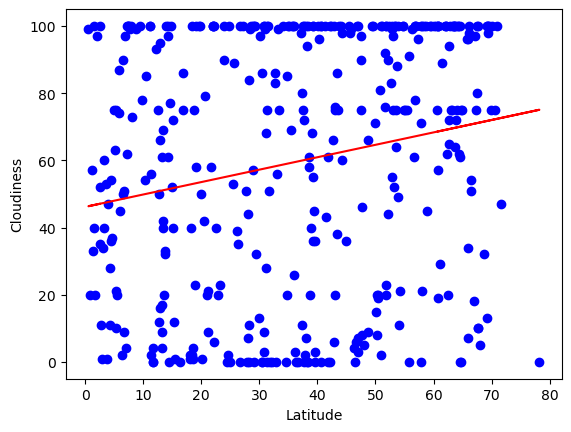

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r is: 0.22484513492194974
The r-squared is: 0.05055533469806978


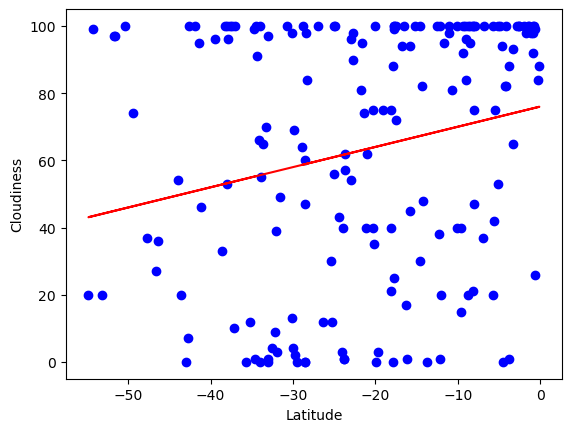

In [36]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r is: 0.09302285864725658
The r-squared is: 0.008653252230907479


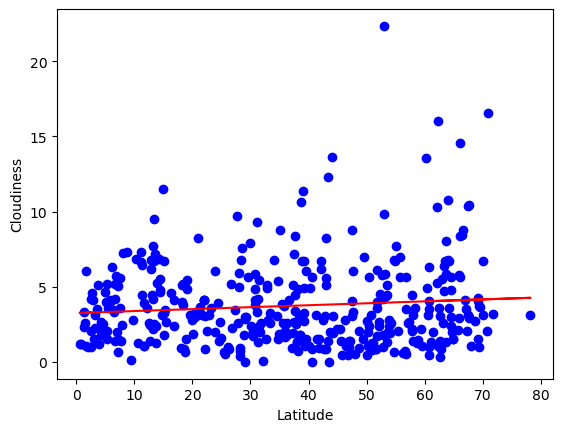

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r is: -0.23695253334829264
The r-squared is: 0.056146503060173734


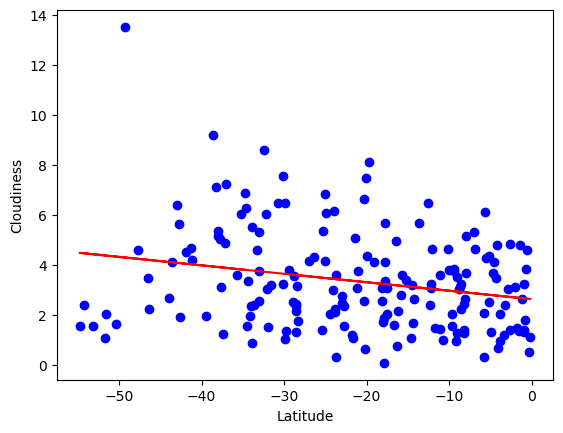

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values =southern_hemi_df['Wind Speed']


(m, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * m + intercept

plt.scatter(x_values, y_values, color='blue', label='Data')
plt.plot(x_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r value
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE